In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv("../data/heart_disease.csv")

# Vérification
print("Dimensions du dataset :", df.shape)
df.head()


Dimensions du dataset : (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Chargement du dataset
df = pd.read_csv("../data/heart_disease.csv")

# 2. Vérification rapide
print("Dimensions du dataset :", df.shape)
df.head()




Dimensions du dataset : (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Affichage des infos générales
df.info()

# Comptage des valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
print(df.isna().sum())
# Affichage des statistiques descriptives
print("\nStatistiques descriptives :")
print(df.describe())            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Valeurs manquantes par colonne :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
tar

In [5]:
# Statistiques descriptives (moyenne, écart‑type, min/max, quartiles)
desc = df.describe().T
desc
# Visualisation des valeurs manquantes
import seaborn as sns           

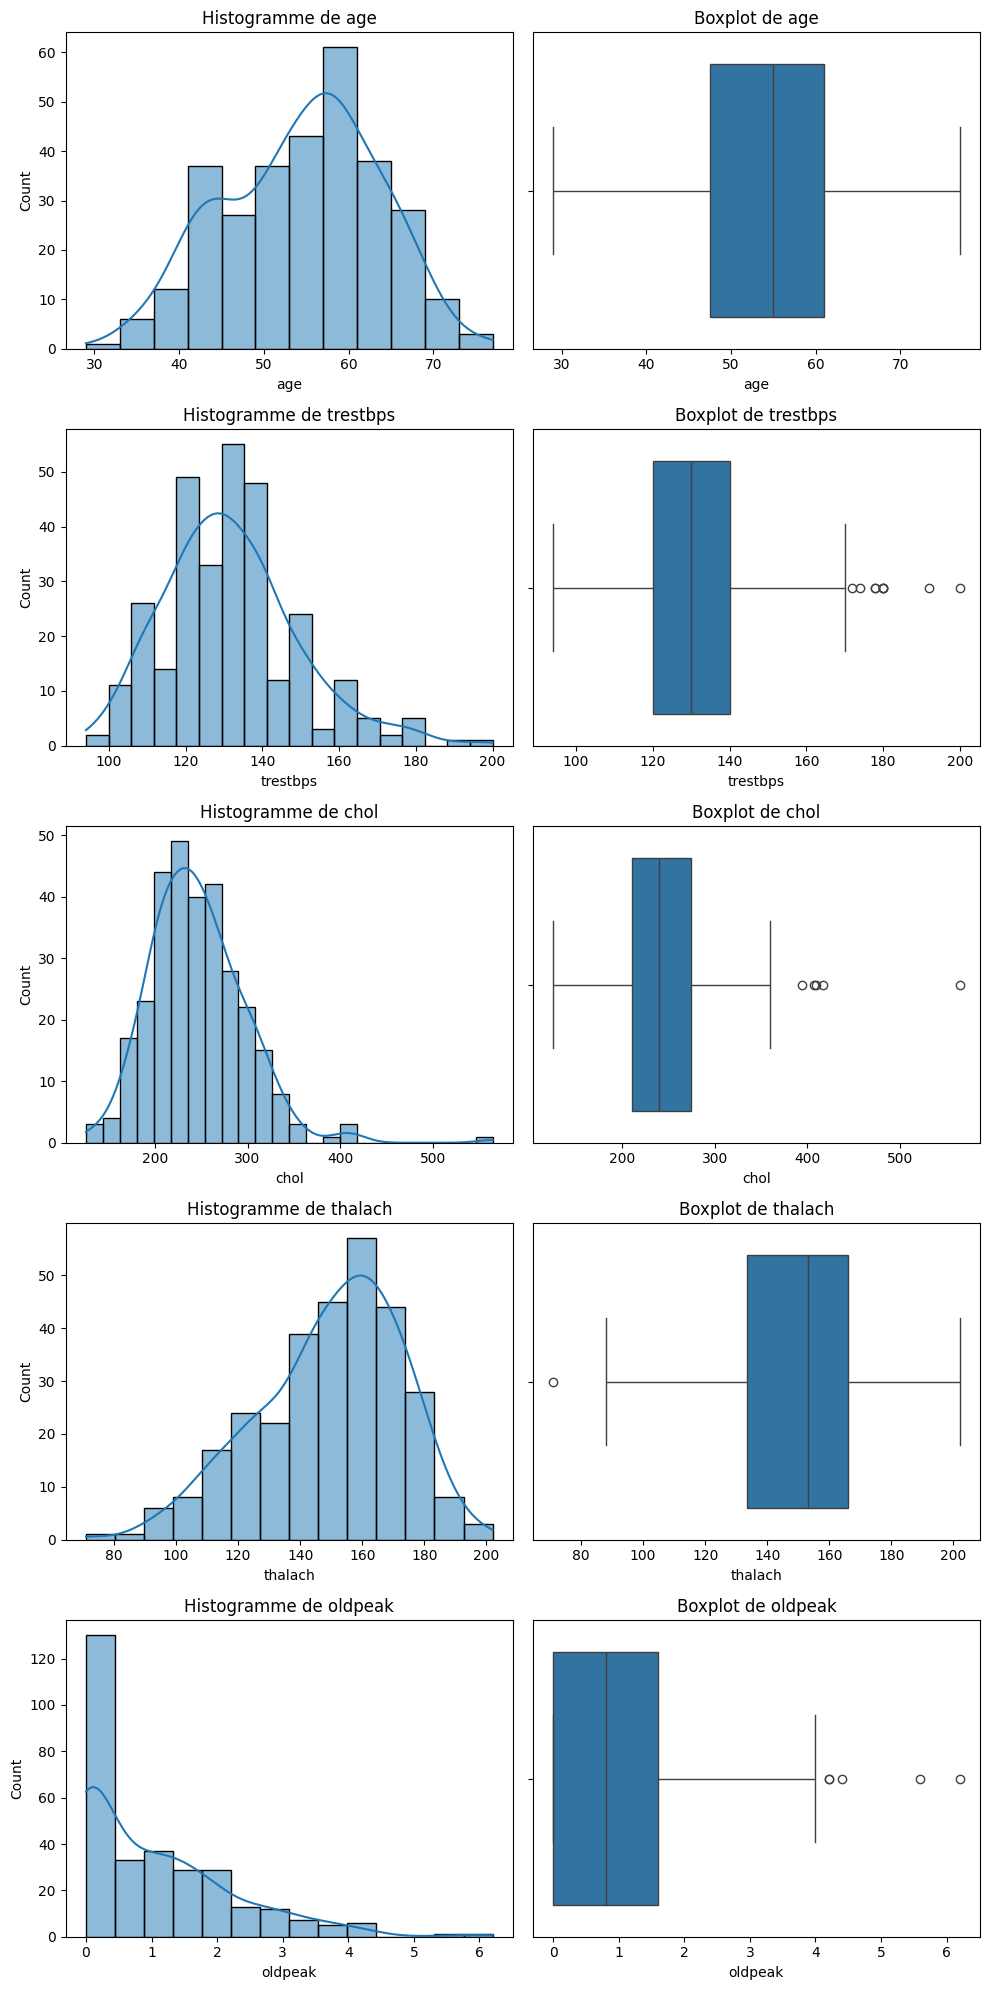

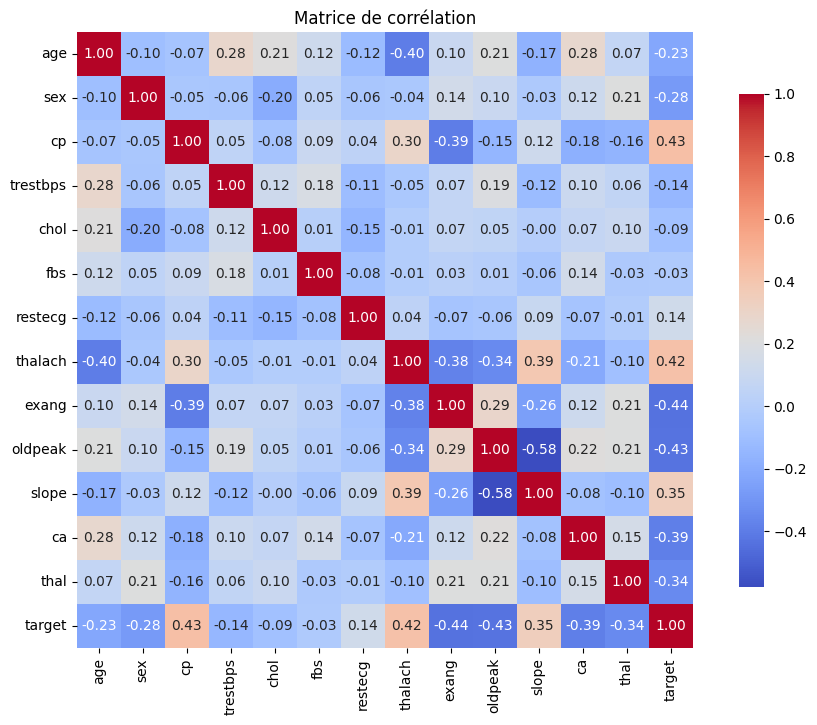

In [6]:
# Histogrammes et boxplots pour détecter d’éventuels outliers
num_cols = ["age","trestbps","chol","thalach","oldpeak"]
fig, axes = plt.subplots(len(num_cols), 2, figsize=(10, 4*len(num_cols)))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i,0], kde=True).set_title(f"Histogramme de {col}")
    sns.boxplot(x=df[col], ax=axes[i,1]).set_title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()
# Visualisation des corrélations entre les variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation")
plt.show()          

In [7]:
cat_cols = ["cp","restecg","slope","ca","thal","sex","fbs","exang"]
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# Vérification des dimensions après encodage
print("Dimensions du dataset après encodage :", df_encoded.shape)   

Dimensions du dataset après encodage : (303, 23)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["age","trestbps","chol","thalach","oldpeak"]
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
# Vérification des dimensions après normalisation
print("Dimensions du dataset après normalisation :", df_encoded.shape)  

Dimensions du dataset après normalisation : (303, 23)


In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Taille train :", X_train.shape, "– Taille test :", X_test.shape)
from sklearn.linear_model import LogisticRegression     

Taille train : (242, 22) – Taille test : (61, 22)


In [10]:
# Sauvegarde du DataFrame pré‑traité
df_encoded.to_csv("../data/heart_cleaned.csv", index=False)
print("Dataset nettoyé enregistré dans data/heart_cleaned.csv")
# Sauvegarde des données d'entraînement et de test
X_train.to_csv("../data/X_train.csv", index=False)
y_train.to_csv("../data/y_train.csv", index=False)
X_test.to_csv("../data/X_test.csv", index=False)
y_test.to_csv("../data/y_test.csv", index=False)        

Dataset nettoyé enregistré dans data/heart_cleaned.csv
